# Research on Russian film distribution data

# Table of Contents 

* [Introduction](#num1)
* [Data description](#num2)
* [1. Loading and merging data ](#num3)
* [2. Data preprocessing](#num4)
* [3. Exploratory data analysis ](#num5)
* [4. A study of films that have received state support ](#num6)
* [5. General conclusion](#num7)

<a id="num1"></a>
## Introduction

**The task is to study the Russian film distribution market and identify current trends.**

To take a closer look at films which have received state support. To determine their level of distribution and rating.

**Required:**
    
1. learn general information;
2. Pre-process the data;
3. Conduct an exploratory analysis of the data;
4. Research films that have received government support;
5. Write an overall conclusion.

<a id="num2"></a>
## Data description

**The `mkrf_movies` table contains information from the rental certificate registry. One movie can have several rental certificates.**

`title` - title of the movie;

`puNumber` - number of the rental certificate;

`show_start_date` - premiere date of the movie;

`type` - type of the movie;

`film_studio` - production studio;

`production_country` - production country;

`director` - director;

`producer` - producer;

`age_restriction` - age category;

`refundable_support` - amount of refundable state support;

`nonrefundable_support` - amount of non-refundable state support funds;

`financing_source` - source of public funding;

`budget` - total budget of the movie;

`ratings` - movie rating on MoviePoetry;

`genres` - movie genre.

Note that the `budget` column already includes the full amount of state support. 
The data in this column is shown only for those films that received state support. 

**The `mkrf_shows` table contains information about film screenings in Russian cinemas.**

`puNumber` - number of the rental certificate;

`box_office` - box office receipts in roubles.

<a id="num3"></a>
## 1. Loading and merging data 

In [6]:
# Import the required library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp
import plotly.figure_factory as ff
from IPython.display import display

# Adjust the display format for float data type in pandas DataFrame
pd.options.display.float_format = '{:,.2f}'.format

# Load the 'mkrf_movies' dataset
data1 = pd.read_csv('datasets/mkrf_movies.csv')

# Load the 'mkrf_shows' dataset
data2 = pd.read_csv('datasets/mkrf_shows.csv')

# Display information about the 'mkrf_movies' dataset
print("\nInformation about the 'mkrf_movies' dataset:")
data1.info()

# Display information about the 'mkrf_shows' dataset
print("\nInformation about the 'mkrf_shows' dataset:")
data2.info()

# Display the first five rows of the 'mkrf_movies' dataset
print("\nFirst five rows of the 'mkrf_movies' dataset:")
display(data1.head())

# Display the first five rows of the 'mkrf_shows' dataset
print("\nFirst five rows of the 'mkrf_shows' dataset:")
display(data2.head())


Information about the 'mkrf_movies' dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres    

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"



First five rows of the 'mkrf_shows' dataset:


,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


**To merge two dataframes on the `puNumber` column, I need to cast them to the same data type. In data1 there are rows in this column with the value 'нет', which prevents for casting to the same type. Consider this row.**

In [7]:
# Look for rows in data1 DataFrame with 'puNumber' equals to 'нет'.
print("Row(s) in data1 DataFrame where 'puNumber' is 'нет':")
display(data1.loc[data1['puNumber'] == 'нет'])

Row(s) in data1 DataFrame where 'puNumber' is 'нет':


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


**Since there is only 1 such row and it has many empty values, we can delete it and then convert the column to the 'int64' type.**

In [8]:
# Remove the row(s) from data1 DataFrame where 'puNumber' is 'нет'.
data1 = data1[data1['puNumber'] != 'нет']

# Now, convert the 'puNumber' column data to integer type in data1 DataFrame.
data1['puNumber'] = data1['puNumber'].astype('int')

# Display the updated info of data1 DataFrame
print("\nUpdated information about the 'data1' dataset:")
data1.info()


Updated information about the 'data1' dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres       

In [9]:
# Merge data1 and data2 dataframes based on 'puNumber' using a left join
data = data1.merge(data2, on='puNumber', how='left')

# Display the merged DataFrame
print("\nMerged DataFrame:")
display(data.head())


Merged DataFrame:


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


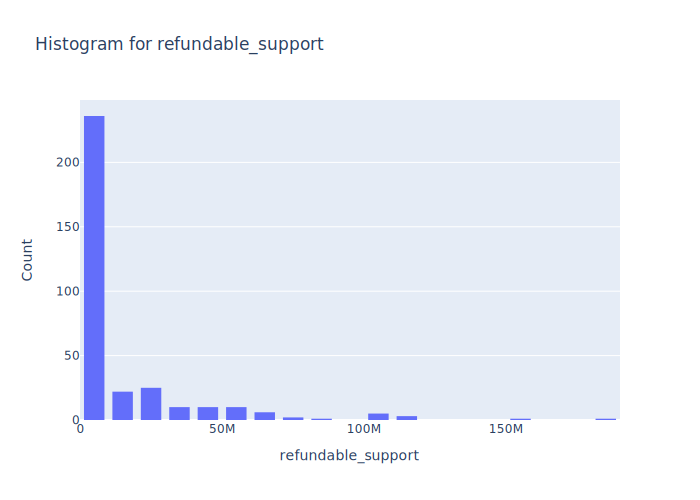

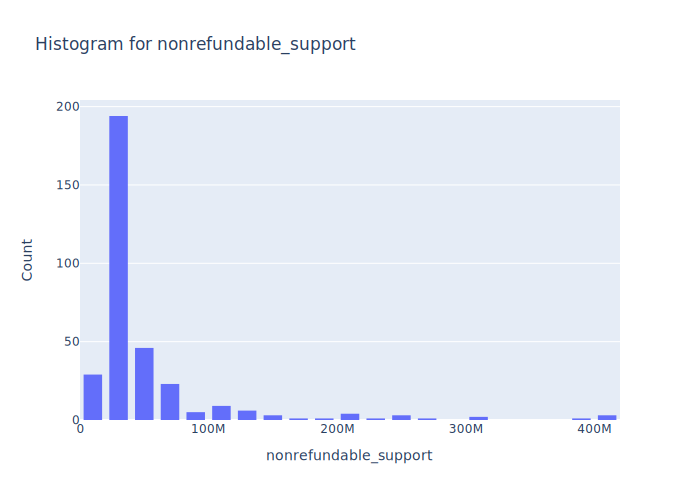

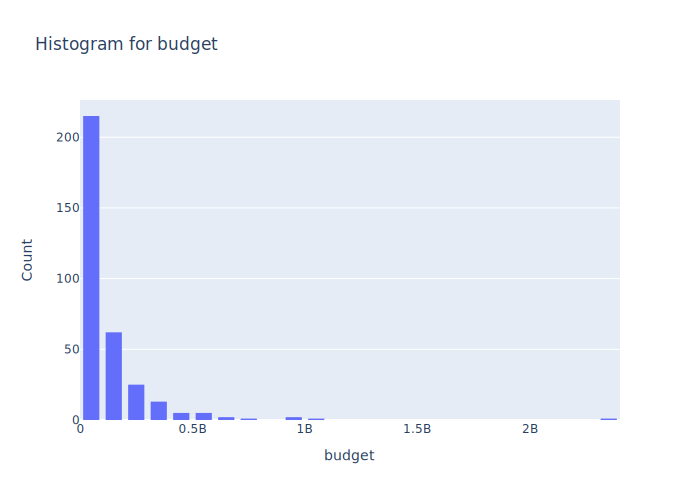

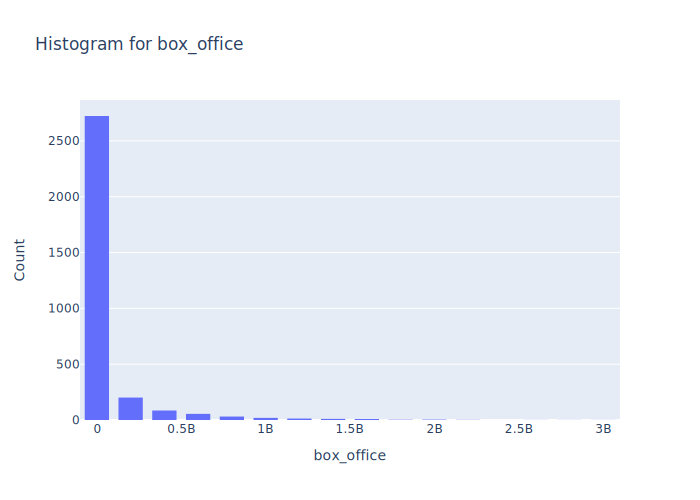

In [10]:
num_cols = ['refundable_support', 'nonrefundable_support', 'budget', 'box_office']

for column in num_cols:
    fig = go.Figure(data=[go.Histogram(x=data[column], nbinsx=30)])
    fig.update_layout(
        title_text=f'Histogram for {column}', # title of plot
        xaxis_title_text=column, # xaxis label
        yaxis_title_text='Count', # yaxis label
        bargap=0.2, # gap between bars of adjacent location coordinates
        bargroupgap=0.1 # gap between bars of the same location coordinates
    )
    fig.show(renderer="svg")

There were 7486 rows in data1 and 3158 rows in data2. We merged by column `puNumber` and condition left, deleting one value in data1. Thus we got 7485 rows.

**Conclusion:**

1. 2 dataframes were merged;
2. common information was investigated.

<a id="num4"></a>
## 2. Data preprocessing

### 2.1 Changing data types


**Change the data type in the following columns:**

1. `show_start_date` - datetime64
2. `ratings` - float64

In [11]:
# Convert the 'show_start_date' column of the data DataFrame to datetime format
data['show_start_date'] = pd.to_datetime(data['show_start_date'])

# Remove timezone from the 'show_start_date' datetime objects
data['show_start_date'] = data['show_start_date'].dt.tz_localize(None)

# Display the 'show_start_date' column of the dataframe
data['show_start_date']

0      2015-11-27 12:00:00
1      2016-09-13 12:00:00
2      2016-10-10 12:00:00
3      2016-06-10 12:00:00
4      2015-07-29 12:00:00
               ...        
7480   2019-12-23 12:00:00
7481   2019-12-24 12:00:00
7482   2019-12-28 12:00:00
7483   2019-12-30 12:00:00
7484   2019-12-30 12:00:00
Name: show_start_date, Length: 7485, dtype: datetime64[ns]

In [12]:
# Consider the unique values in the `ratings` column 
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [13]:
def correct_ratings(row):
    # Remove '%' from the row values and convert them to float
    # invalid parsing will be set as NaN
    row = pd.to_numeric(row.str.replace('%', ''), errors='coerce')

    # If value > 10 it is probably a percentage that we convert it to a normal rating
    row[row > 10] = row[row > 10] / 10

    return row

# Apply the function to the 'ratings' column
data['ratings'] = correct_ratings(data['ratings'])

# Display unique values
print(data['ratings'].unique())

[7.2 6.6 6.8 7.7 8.3 8.  7.8 8.1 7.1 6.  7.4 5.8 8.7 6.3 6.9 5.  4.3 7.3
 7.  6.4 nan 8.2 7.5 6.7 7.9 5.9 6.2 5.6 6.5 2.4 7.6 6.1 8.6 8.5 8.8 5.5
 5.1 5.7 5.4 9.9 4.4 4.5 5.3 4.1 8.4 2.6 3.8 4.6 4.8 4.  3.  1.6 4.2 5.2
 4.7 4.9 3.9 2.7 3.3 2.9 2.8 3.7 1.4 3.1 9.7 3.5 3.2 1.5 2.1 2.5 9.2 3.4
 1.1 3.6 9.1 9.4 9.  1.9 1.  8.9 1.3 1.8 1.2 1.7 9.8]


In [14]:
data.dtypes

title                            object
puNumber                          int32
show_start_date          datetime64[ns]
type                             object
film_studio                      object
production_country               object
director                         object
producer                         object
age_restriction                  object
refundable_support              float64
nonrefundable_support           float64
budget                          float64
financing_source                 object
ratings                         float64
genres                           object
box_office                      float64
dtype: object

**Conclusion:**

1. The `show_start_date` column - converted to datetime64 format.

2. The `ratings` column was converted to float64 format.

### 2.2 Processing of skips in the dataframe

**Visualize the percentage number of gaps in the columns.**

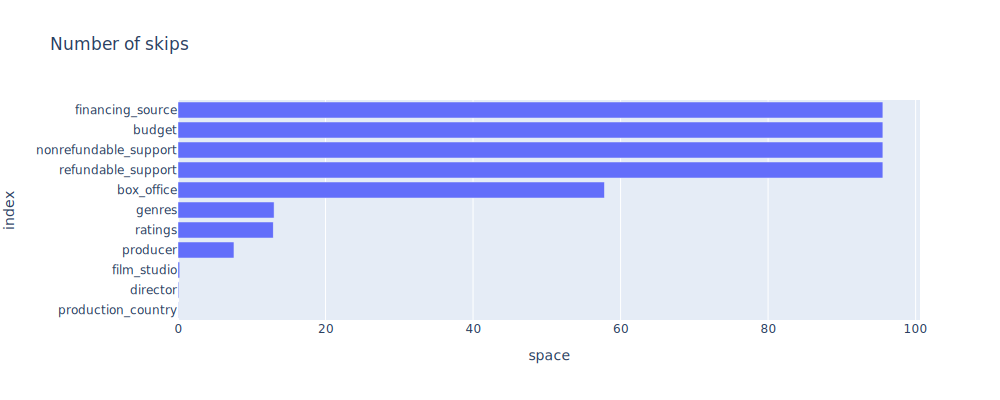

In [15]:
def pass_value_barh(df):
    # Compute percentage of NaNs
    missing = (df.isna().mean()*100).to_frame().rename(columns = {0:'space'})

    # Filter out columns with no missing values
    missing_with_values = missing.query('space > 0')
    
    # Nothing to plot
    if len(missing_with_values) == 0:
        print('No skips left')
        return

    # Sort DataFrame for visualization purposes
    missing_with_values_sorted = missing_with_values.sort_values(by='space', ascending=True).reset_index()

    # Creating Plotly bar chart
    fig = px.bar(
        missing_with_values_sorted, 
        x='space',
        y='index', 
        orientation='h',
        width=1000, 
        height=400, 
        title='Number of skips'
    )

    fig.show(renderer="svg")

pass_value_barh(data)

In [16]:
# Sum of empty values 
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

**Let's fill in the blank values.**

In [17]:
data = data.fillna(value={'film_studio':'unknown_studio', 'production_country':'unknown_country', 'director':'unknown_director', 
                          'producer':'unknown_producer', 'refundable_support':0, 
                          'nonrefundable_support':0, 'budget':0, 'financing_source':'not_financing',
                          'genres':'unknown_genres'})
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,0.00,not_financing,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown_producer,«6+» - для детей старше 6 лет,0.00,0.00,0.00,not_financing,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,not_financing,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,not_financing,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,not_financing,6.80,"фантастика,боевик,триллер",NaN


In [18]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support          0
nonrefundable_support       0
budget                      0
financing_source            0
ratings                   966
genres                      0
box_office               4327
dtype: int64

**Conclusion: empty values in the dataframe were preprocessed.**


### 2.3 Handling explicit duplicates

**Let's check the DataFrame for explicit duplicates.**

In [19]:
# Function for detecting duplicates in the whole DataFrame 
def check_for_duplicates(df):
    duplicates = df.duplicated()
    if duplicates.any():
        print(f'There are duplicate rows in the DataFrame')
    else:
        print('There are no duplicate rows in the DataFrame')

# Use the function for our DataFrame
check_for_duplicates(data)

# Function for detecting duplicates in columns 
def check_column_for_duplicates(df, column_name):
    duplicates = df.duplicated(column_name, keep=False)

    if duplicates.any():
        print(f'There are duplicate values in the {column_name} column.')
        print("These are the rows with duplicate values:")
        display(df[duplicates])
    else:
        print(f'There are no duplicate values in the {column_name} column.')

# Use the function for our DataFrame
check_column_for_duplicates(data, 'puNumber')

There are no duplicate rows in the DataFrame
There are duplicate values in the puNumber column.
These are the rows with duplicate values:


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.00,0.00,0.00,not_financing,7.00,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,0.00,not_financing,7.60,"драма,мелодрама,история",NaN
5066,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.00,0.00,0.00,not_financing,7.40,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.00,0.00,0.00,not_financing,6.80,"комедия,криминал",NaN


**There are 2 duplicates. Let's give them a new puNumber, which will be unique even if data will be added in the future.**

In [20]:
# Set the 'puNumber' for row at index 4638 as the maximum 'puNumber' plus 1
data.at[4638,'puNumber'] = data['puNumber'].max()+1

# Set the 'puNumber' for row at index 5067 as the maximum 'puNumber' plus 1
data.at[5067,'puNumber'] = data['puNumber'].max()+1

# Check and display the first 5 duplicates based on 'puNumber'
data[data.duplicated(['puNumber'])].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


**Conclusion: 2 duplicates were found in the `puNumber` column. A new unique identifier was assigned to these duplicates.**

### 2.4 Exploring categorical meanings

**Let's remove the space at the beginning of the line.**

In [21]:
# Get unique values in the 'type' column
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [22]:
# Strip leading and trailing whitespace from entries in 'type' column
data['type'] = data['type'].str.strip()

# Recheck unique values in the 'type' column after removing whitespace
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

**Remove duplicates in the `production_country` column.**

In [23]:
# Count the number of unique entries in the 'production_country' column after trimming the whitespaces
print('Number of unique values in the "production_country" column:', len(data['production_country'].str.strip().unique()))

Number of unique values in the "production_country" column: 935


In [24]:
def good_country(row):
    
    '''
    Function to abbreviate the country names.
    The function does following:
    1. Converts to lowercase
    2. Replace comma with space
    3. Replace certain phrases with abbreviated forms
    4. Replace 'республика', '-' with space
    5. Strips extra spaces
    6. Sorts the data
    7. Joins the data with space
    '''
    return ' '.join(sorted(row.lower().replace(',', ' ').
                           replace('южная корея', 'ю.корея').
                           replace('объединенные арабские эмираты', 'оаэ').
                           replace('2019', 'германия').
                           replace('западный берлин', 'з.берлин').
                           replace('новая зеландия', 'н.зеландия').
                           replace('-', ' ').
                           replace('республика', ' ').
                           replace('кнр', 'китай ').
                           replace('княжество андорра', 'к.андорра').
                           split()))    

# Apply the ```good_country``` function to the 'production_country' column to abbreviate the country names
data['production_country'] = data['production_country'].apply(good_country)

# Count the number of unique entries in the 'production_country' column after the abbreviation
print('Number of unique values in the "production_country" column after removing duplicates:', len(data['production_country'].unique()))

Number of unique values in the "production_country" column after removing duplicates: 661


**Remove duplicates in the `genres` column.**

In [25]:
# Count the number of unique entries in the 'genres' column
print('Number of unique values in the "genres" column:', len(data['genres'].unique()))

Number of unique values in the "genres" column: 743


In [26]:
def good_genres(row):
    
    '''
    Function to sort the genres in alphabetical order.
    Function does following:
    1. Check if row is not NaN.
    2. Splits the genres at ','
    3. Sorts the genres
    4. Joins the genres with ', '
    '''
    if not pd.isna(row):
        return ', '.join(sorted(row.split(',')))
    else: 
        # return the row as it is if it is NaN
        return row

# Apply the ```good_genres``` function to the 'genres' column to sort the genres
data['genres'] = data['genres'].apply(good_genres)

# Count the number of unique entries in the 'genres' column after sorting the genres
print('Number of unique values after removing duplicates in the "genres" column:', len(data['genres'].unique()))

Number of unique values after removing duplicates in the "genres" column: 474


**Conclusion:**

1. Removed spaces in the values in the `type` column.
2. Removed implicit duplicates in the `production_country` column.
3. Removed implicit duplicates in the `genres` column.

### 2.5 Exploring quantitative values

**Let's check the dataset for suspicious data.**

In [27]:
# Calculate sum of 'refundable_support' and 'nonrefundable_support'
total_support = data['refundable_support'] + data['nonrefundable_support']

# Get count of records where 'budget' is less than the total of 'refundable_support' and 'nonrefundable_support'
data.loc[data['budget'] < total_support].count()

title                    17
puNumber                 17
show_start_date          17
type                     17
film_studio              17
production_country       17
director                 17
producer                 17
age_restriction          17
refundable_support       17
nonrefundable_support    17
budget                   17
financing_source         17
ratings                  16
genres                   17
box_office               17
dtype: int64

**Conclusion:** 17 suspicious values were found. Thus, their budget is 0, but the amount of state support is certain values.  The budget column already includes the full amount of state support, which does not match the values in the table. There are few such rows, they can be deleted because there is no possibility to fill them with something.

In [28]:
# Identify the rows to be drop by checking where the budget is less than total support
rows_to_drop = data[data['budget'] < total_support].index

# Remove suspicious data from the dataset
data = data.drop(rows_to_drop)

**Conclusion: 17 suspicious quantitative values were removed.**

### 2.6 Creating new columns

**Let's create new columns with information about the year of hire. Let's select the year from the premiere date of the movie.**

In [29]:
# Create a new column 'year' by extracting year from 'show_start_date'
data['year'] = pd.DatetimeIndex(data['show_start_date']).year 

# Display the new 'year' column
data['year']

0       2015
1       2016
2       2016
3       2016
4       2015
        ... 
7480    2019
7481    2019
7482    2019
7483    2019
7484    2019
Name: year, Length: 7468, dtype: int32

**Let's create 2 columns: with the first and last name of the main director and the main genre of the movie. The columns will contain the first values from the list of directors and genres respectively.**

In [30]:
def first_name_and_genre(row):
    '''
    Function to get the first name/genre from a list.
    Function checks if row is NaN.
    If not, Splits the row at ',' and return first item.
    Else, returns row as it is.
    '''
    if not pd.isna(row):
        return row.split(',')[0]
    else: 
        return row

# Apply the function 'first_name_and_genre' to 'director' column to get the first director
data['first_director'] = data['director'].apply(first_name_and_genre)

# Apply the 'first_name_and_genre' function to 'genres' column to get the main genre
data['first_genre'] = data['genres'].apply(first_name_and_genre)

# Display the first few records of the dataset
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,first_director,first_genre
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",сша,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,0.00,not_financing,7.20,"боевик, драма, мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",ссср,Е.Матвеев,unknown_producer,«6+» - для детей старше 6 лет,0.00,0.00,0.00,not_financing,6.60,"военный, драма",NaN,2016,Е.Матвеев,военный
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",сша,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,not_financing,6.80,"боевик, триллер, фантастика",NaN,2016,Тимур Бекмамбетов,боевик
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",сша,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,not_financing,6.80,"боевик, триллер, фантастика",NaN,2016,Тимур Бекмамбетов,боевик
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",сша,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,not_financing,6.80,"боевик, триллер, фантастика",NaN,2015,Тимур Бекмамбетов,боевик


**Let's calculate how much of the total budget of the movie is state support.**

In [31]:
# Calculate the total state support ('refundable_support' + 'nonrefundable_support')
total_support = data['refundable_support']+data['nonrefundable_support']

# Calculate the portion of budget that comes from state support and store this in a new column 'budget_share'
data['budget_share'] = total_support / data['budget']

# Display records where the budget is greater than zero
data.loc[data['budget']>0]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,first_director,first_genre,budget_share
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма, мелодрама","365,353.60",2013,А.Атанесян,драма,0.33
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,NaN,unknown_genres,"28,140.00",2014,А.Якимчук,unknown_genres,0.70
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия, фантастика","19,957,031.50",2013,Р.Давлетьяров,комедия,0.61
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",2014,М.Угаров,драма,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","980,000,000.00",Фонд кино,6.00,"биография, драма, история","717,703,185.53",2019,А.Кравчук,биография,0.51
7465,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"100,000,000.00",0.00,"190,000,000.00",Фонд кино,6.70,"мультфильм, приключения, семейный","501,069,235.00",2019,Д.Шмидт,мультфильм,0.53
7473,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","944,000,000.00",Фонд кино,5.70,"боевик, фантастика",NaN,2019,Ф.Бондарчук,боевик,0.53
7475,Я свободен,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,"30,000,000.00","46,154,000.00",Министерство культуры,5.90,драма,NaN,2019,И.Северов,драма,0.65


**Conclusion:**

1. The data types have been converted;
2. Gaps have been filled;
3. duplicates have been processed;
4. Suspicious values were removed;
5. New columns were added.

<a id="num5"></a>
## 3. Exploratory data analysis 

**Look at how many movies were released each year.**

In [32]:
# Let's build a summary table with the number of movies by columns 'puNumber','box_office' grouped by year 
data_box_office=data.pivot_table(index='year', values=['puNumber','box_office'], aggfunc='count')
display(data_box_office)

,box_office,puNumber
year,,
2010,105,985
2011,109,622
2012,128,593
2013,184,630
2014,278,805
2015,459,699
2016,523,815
2017,355,503
2018,471,887


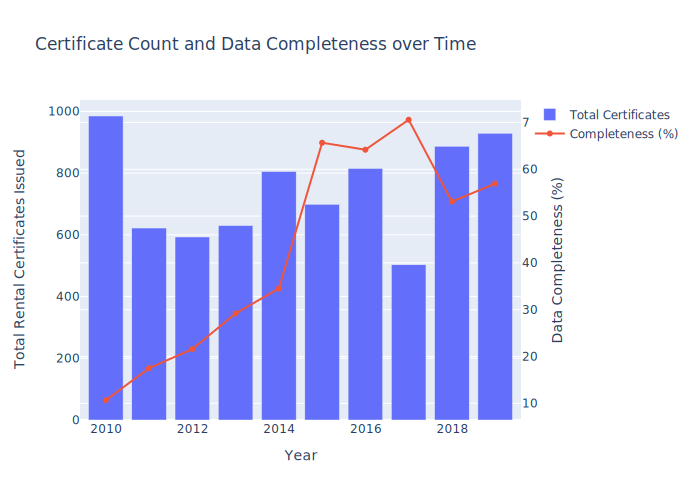

In [33]:
# Initialize lists to store the year, certificate counts, and completeness percentages
years = list(range(2010, 2020))
cert_counts = []
completeness_percentages = []

# Loop through each year from 2010 to 2019
for i in years:
    cert_count = len(data[data['year'] == i])
    cert_counts.append(cert_count)
    
    incomplete_data = len(data[(data['year'] == i) & (data['box_office'].isna())])
    completeness_percentage = (1 - (incomplete_data / cert_count)) * 100
    completeness_percentages.append(completeness_percentage)

# Create a dataframe with year, certificate counts and completeness percentages
df = pd.DataFrame({'Year':years, 'Cert_Count':cert_counts, 'Completeness_Percentage':completeness_percentages})

# Create a plotly graph object
fig = go.Figure(data=[
    go.Bar(name='Total Certificates', x=df['Year'], y=df['Cert_Count']),
    go.Scatter(name='Completeness (%)', x=df['Year'], y=df['Completeness_Percentage'], yaxis='y2')
])

# Create axis titles
fig.update_layout(
    title='Certificate Count and Data Completeness over Time',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Total Rental Certificates Issued'),
    yaxis2=dict(title='Data Completeness (%)', overlaying='y', side='right')
)

# Show the plot
fig.show(renderer="svg")

**This creates a bar and line chart on the same plot. The bar chart represents the total rental certificates issued, while the line chart shows data completeness percentage. Bar chart and line chart are used to represent two different y-axis values on the same graph.**

*For further analysis we will use data after 2014 as the completeness of information is more than 50%*

**Let's examine how the dynamics of movie distribution changed by year. In which year the amount of collections was the minimum and maximum.**

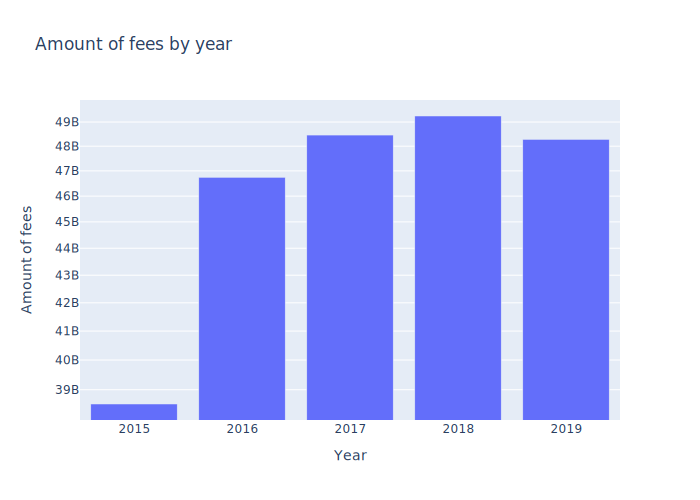

In [34]:
# Filter the data for years greater than 2014
data_sr = data[data['year']>2014]

# Pivot the data to calculate total 'box_office' collection per year
films_per_year_df = data_sr.pivot_table(index='year',
                                        values=['box_office'],
                                        aggfunc='sum')

# Reset index of dataframe
films_per_year_df.reset_index(inplace=True)

# Plot using plotly
fig = px.bar(films_per_year_df, 
             x='year', 
             y='box_office',
             title='Amount of fees by year',
             log_y=True,  # y-axis is log-scaled
             labels={'box_office':'Amount of fees', 'year':'Year'}
             )

fig.show(renderer="svg")

In [35]:
# Calculate the index of the maximum and minimum 'box_office' values
max_index = films_per_year_df['box_office'].idxmax()
min_index = films_per_year_df['box_office'].idxmin()

# Fetch the respective rows using the calculated indices
max_row = films_per_year_df.loc[max_index]
min_row = films_per_year_df.loc[min_index]

# Print the maximum and minimum 'box_office' values along with the corresponding year
print('Maximum box-office collection:', '{:,.0f} in {:.0f} year'.format(max_row['box_office'], max_row['year']))
print('Minimum box-office collection:', '{:,.0f} in {:.0f} year'.format(min_row['box_office'], min_row['year']))

Maximum box-office collection: 49,251,991,405 in 2018 year
Minimum box-office collection: 38,527,827,199 in 2015 year


**Conclusions:**

Over the five-year period from 2015 to 2019, the total box-office collection of movies showed an overall upward trend, indicating a growth in the movie industry's revenue during this period.

In 2015, the total box-office collection was about 38.5 billion, which was the lowest in the given time frame. However, this amount increased over the years, reaching a peak of approximately 49.3 billion in 2018.

Notably, despite this general upward trend, there was a small decrease in box-office collection in 2019, with the total revenue falling to 48.3 billion from the previous year's 49.3 billion. This dip could be due to several factors such as a decrease in the number of high-grossing films, changes in audience preferences, increase in digital streaming platforms drawing audiences away from the theaters, or other market and industry conditions.

In summation, over the period from 2015 to 2019, the movie industry had shown a positive growth in terms of revenue, with a slight decrease in 2019, which warrants further investigation to understand the underlying causes.

**Use the summary table to calculate the average and median fees for each year.**

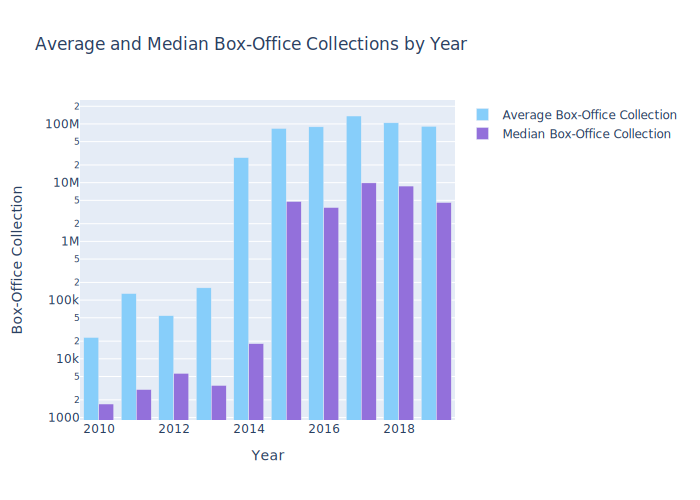

In [36]:
# Data preparation: Calculate the average and median box-office collection for each year
films_per_year_df = data.pivot_table(index='year',
                                    values=['box_office'],
                                    aggfunc=['mean', 'median'])
# Remove the multiindex - drop the level 1 in columns (which is currently 'box_office'))
films_per_year_df.columns = films_per_year_df.columns.droplevel(1)

# Plot using plotly
fig = go.Figure()

# Add series for mean values
fig.add_trace(go.Bar(x=films_per_year_df.index, 
                     y=films_per_year_df['mean'], 
                     name='Average Box-Office Collection',
                     marker_color='lightskyblue'))

# Add series for median values
fig.add_trace(go.Bar(x=films_per_year_df.index, 
                     y=films_per_year_df['median'], 
                     name='Median Box-Office Collection',
                     marker_color='MediumPurple'))

# Customize layout
fig.update_layout(
    title_text='Average and Median Box-Office Collections by Year',
    xaxis_title='Year',
    yaxis_title='Box-Office Collection',
    yaxis_type='log',  # Logarithmic scale
    barmode='group'  # Bars of the different series will be positioned side-by-side
)

fig.show(renderer="svg")

**Conclusions:**

From 2010 to 2014, both the average (mean) and the median box-office collections were relatively low with a large jump in values observed in 2015. This sudden increase may indicate a number of factors—higher production budgets, increases in ticket prices, growth in audience sizes, etc. We should also keep in mind that our data for this period is not complete. 

The mean box-office collections were highest in 2017, signifying that this year had several high-grossing films. It's worth noting however that a high mean can be influenced by a few extremely large values—just a handful of "blockbuster" films can significantly raise the average box office.

The median (the middle value), on the other hand, can oftentimes be a better indicator of the 'typical' film, as it is not distorted by extremely high or extremely low collections. From the data, you can see that median collections also spiked in 2017, but have been falling steadily ever since.

The difference between the mean and median for years 2016 through 2019 suggests that during these years, while there were a few high-earning movies that pushed up the mean collections, the majority of movies had relatively more modest earnings.

Overall, this data highlights the disparity in box-office performance among films and suggests a trend of increasing movie earnings over the years (with recent declines in median values).

**Let's determine whether audience age restrictions ("6+", "12+", "16+", "18+", etc.) affect a movie's box office receipts between 2015 and 2019.**

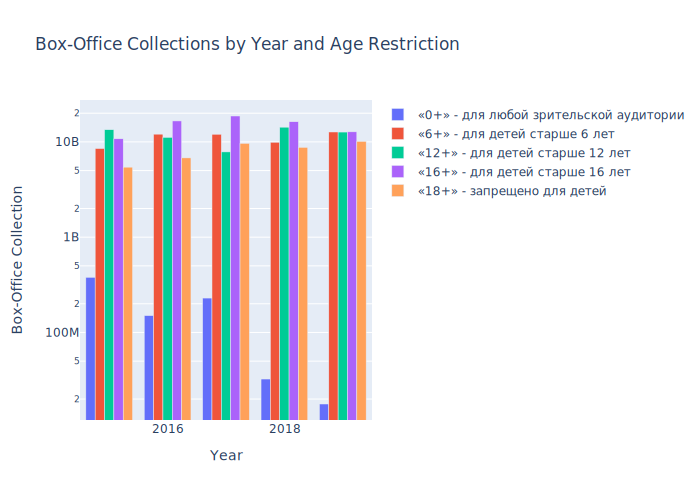

In [37]:
# Creating a new DataFrame consolidating 'box_office' for each 'year' and 'age_restriction' 
grouped_df = data_sr.groupby(['year', 'age_restriction'])['box_office'].sum().reset_index()

# Add a bar for each age restriction category
age_categories = ['«0+» - для любой зрительской аудитории', 
                  '«6+» - для детей старше 6 лет', 
                  '«12+» - для детей старше 12 лет', 
                  '«16+» - для детей старше 16 лет', '«18+» - запрещено для детей']

fig = go.Figure()

for age_category in age_categories:
    df_subset = grouped_df[grouped_df['age_restriction'] == age_category]
    fig.add_trace(go.Bar(name=age_category,
                        x=df_subset['year'],
                        y=df_subset['box_office']))

# Customize layout
fig.update_layout(barmode='group',
                  title_text='Box-Office Collections by Year and Age Restriction',
                  xaxis_title='Year',
                  yaxis_title='Box-Office Collection',
                  yaxis_type='log')  # Logarithmic scale
fig.show(renderer="svg")

**Conclusions:**

Based on the data presented, it can be deduced that movies with a "12+" age restriction consistently attract the highest box-office revenue throughout 2015 to 2019, barring years 2016 and 2017 where "16+" rated movies dipped slightly ahead. On contrast, films with a "0+" rating consistently generated the least revenue.

Interestingly, revenues from "6+" rated films noticeably increased in 2016 and 2017, overtaking those from "18+" films. However, after 2017, it decreased and was back in the lower range.

The data also clearly shows an increasing trend in the box office performance of "16+" and "18+" films from 2015 to 2017, but starting from 2018 the box office revenue for these age restrictions started to decline.

Overall, it appears that movies with age restrictions of "12+" and "16+" are most popular among audiences, and hence generate the highest box office revenues. The reason behind the consistent low performance of "0+" films however, could be due to limited target demographic or the nature of their content.


**Let's determine which age-restricted movies made the most money at the box office.**

c:\Users\Shiro\miniconda3\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



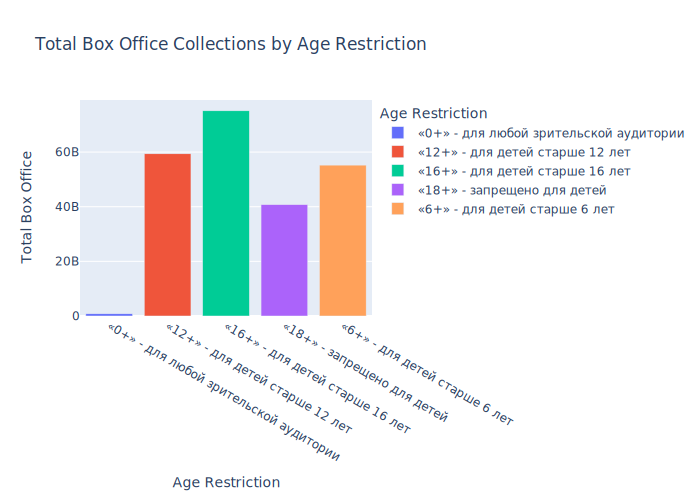

In [38]:
# Create pivot table with index as 'age_restriction' and value as sum of 'box_office'
age_limit_rating = data_sr.pivot_table(index=['age_restriction'], 
                                       values='box_office', 
                                       aggfunc='sum')

# Resetting the index for the DataFrame. This gives us 'age_restriction' as a column
age_limit_rating = age_limit_rating.reset_index()

# Renaming columns for better understanding
age_limit_rating.columns = ['Age Restriction', 'Total Box Office']

# Using plotly express to create bar chart with x-axis as age restrictions 
# and y-axis as total box office collection, colored by 'Age Restriction'
fig = px.bar(age_limit_rating, 
             x='Age Restriction', 
             y='Total Box Office',
             labels={'Total Box Office':'Total Box Office',
                     'Age Restriction':'Age Restriction'},
             color='Age Restriction',
             title='Total Box Office Collections by Age Restriction')

# Display the figure
fig.show(renderer="svg")

**Conclusions:**

Based on the box office receipts data we have, movies that are rated "16+" have grossed the most in Russian cinemas, followed by movies rated "12+". "18+" rated movies are the third highest, and those rated "6+" follow. Movies rated "0+", accessible to all audiences, have generated the least revenue. This could suggest that the highest grossing films tend to target older, specifically teenage, audiences in Russia.

**Let's look at the average amount of fees by year by age limit.**

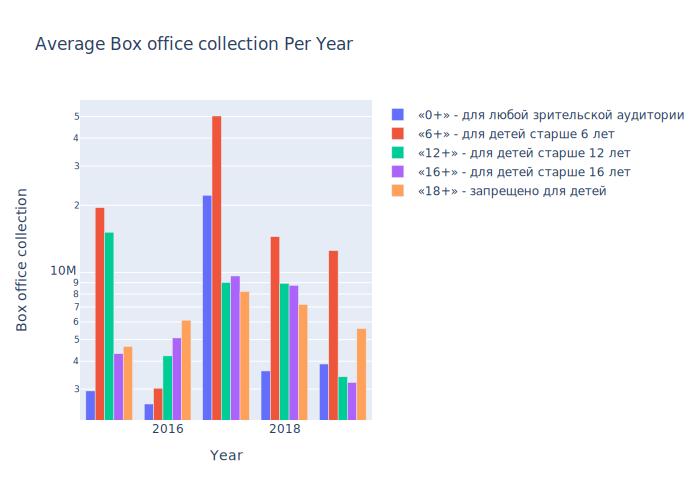

In [39]:
# Creating a pivot table from data_sr where each row represents a year and each
# column represents an age restriction category. Each entry in the table is the
# median box office sales for that year and age restriction
films_per_year_df = data_sr.pivot_table(index='year', columns='age_restriction', 
                                values='box_office', aggfunc='median').reset_index()

# Defining the age restriction categories the pivot table will work with
age_restrictions = ['«0+» - для любой зрительской аудитории', 
                    '«6+» - для детей старше 6 лет', 
                    '«12+» - для детей старше 12 лет', 
                    '«16+» - для детей старше 16 лет', 
                    '«18+» - запрещено для детей']

# An empty list to hold our plot data
data = []

# Generate a bar plot for each age restriction category
for ar in age_restrictions:
    # Each element in data is a Bar object where 'x' holds the year and 'y' holds 
    # the median box office for a given age restriction category
    data.append(go.Bar(name=ar, x=films_per_year_df['year'], y=films_per_year_df[ar]))

# Create a grouped bar plot 
fig = go.Figure(data=data)

# Specify layout details such as plot mode group, title,
# log scale for y axis and axis labels
fig.update_layout(barmode='group', title='Average Box office collection Per Year', 
                  yaxis_type="log", xaxis_title='Year', yaxis_title='Box office collection')

# Render the plot
fig.show(renderer="svg")

**Conclusions:**

In 2015, movies with "6+" and "12+" ratings were generally the highest earners, while those with "0+" rating earned the least.

In 2016, movies rated "18+" had the highest median earnings, while those rated "6+" saw a significant drop and earned the least.

In 2017, there was a drastic increase in earnings for movies rated "0+" and "6+". Particularly for "0+" rating, the earnings were almost ten times than the previous year. It's worth noting that 2017 was a more profitable year for most categories as compared to 2016.

In 2018, the earnings for "0+" rated movies increased yet again and the "18+" category went down in median earnings compared to the previous year, but the "6+" age restriction category remained leading.

In 2019, the earnings for all categories seemed to have generally fallen, with the "18+" rated movies experiencing an increase from the previous year. The "0+" rated movies stayed approximately the same whilst the "6+" rated movies earned the most.

Overall, it seems that movies rated "6+" consistently have higher median earnings across the years. Trends fluctuate for other age ratings, indicating that box office collections are possibly influenced by other factors such as the quality and popularity of the movies released each year.


**Let's check what type of movie predominates in the 6+ and 0+ age category.**

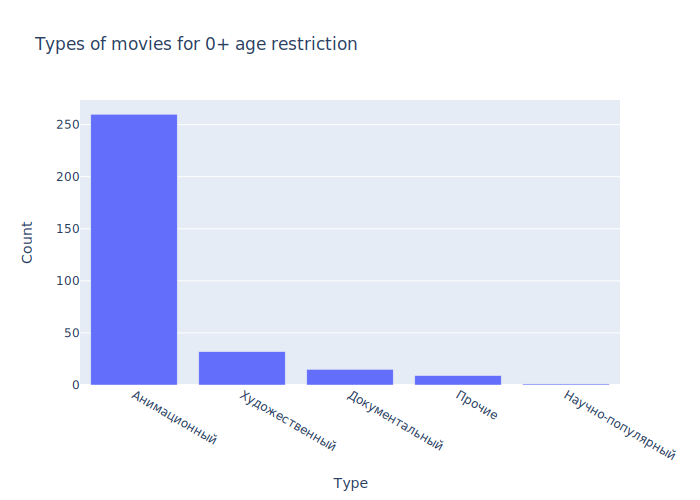

In [40]:
# Extracting movies with 6+ age restriction
movies_6_plus = data_sr[data_sr['age_restriction'] == '«6+» - для детей старше 6 лет']

# Getting counts of each type of movie for 6+ age restriction
type_counts_6_plus = movies_6_plus['type'].value_counts().reset_index()

# Renaming columns for better understanding
type_counts_6_plus.columns = ['Type', 'Count']

# Plotting bar chart for 6+ age restriction
fig_6_plus = px.bar(type_counts_6_plus, x='Type', y='Count', title='Types of movies for 6+ age restriction')
fig_6_plus.show()

# Extracting movies with 0+ age restriction
movies_0_plus = data_sr[data_sr['age_restriction'] == '«0+» - для любой зрительской аудитории']

# Getting counts of each type of movie for 0+ age restriction
type_counts_0_plus = movies_0_plus['type'].value_counts().reset_index()

# Renaming columns for better understanding
type_counts_0_plus.columns = ['Type', 'Count']

# Plotting bar chart for 0+ age restriction
fig_0_plus = px.bar(type_counts_0_plus, x='Type', y='Count', title='Types of movies for 0+ age restriction')
fig_0_plus.show(renderer="svg") 

**Conclusions:**

For the 6+ age category, animated movies (Анимационный) are the most prevalent type of movie with a count of 232, followed by artistic movies (Художественный) with a count of 171. Other types of movies like documentaries, other genres, and popular science movies are significantly less prevalent.

For the 0+ age category, animated movies are even more prevalent with a count of 260, which is notably higher than in the 6+ category. The other types of movies are considerably less common in the 0+ category compared to the 6+ category, especially artistic movies which only have a count of 32, as opposed to 171 in the 6+ category.

This data suggests that in Russian cinemas, animated movies are the most common type of movie for both age categories. They are especially predominant in the 0+ age category, likely because they are suitable for all ages. Artistic movies are also common in the 6+ category, but significantly less so for the 0+ category, perhaps because the themes or presentation may not be as suitable for younger audience members. Documentaries, other genres, and especially popular science movies seem to be less preferred overall. The stark difference between the 6+ and 0+ categories for Artistic movies suggests that such movies might commonly have elements not suitable for very young audiences


**Let's look at the changes in the average movie rating.**

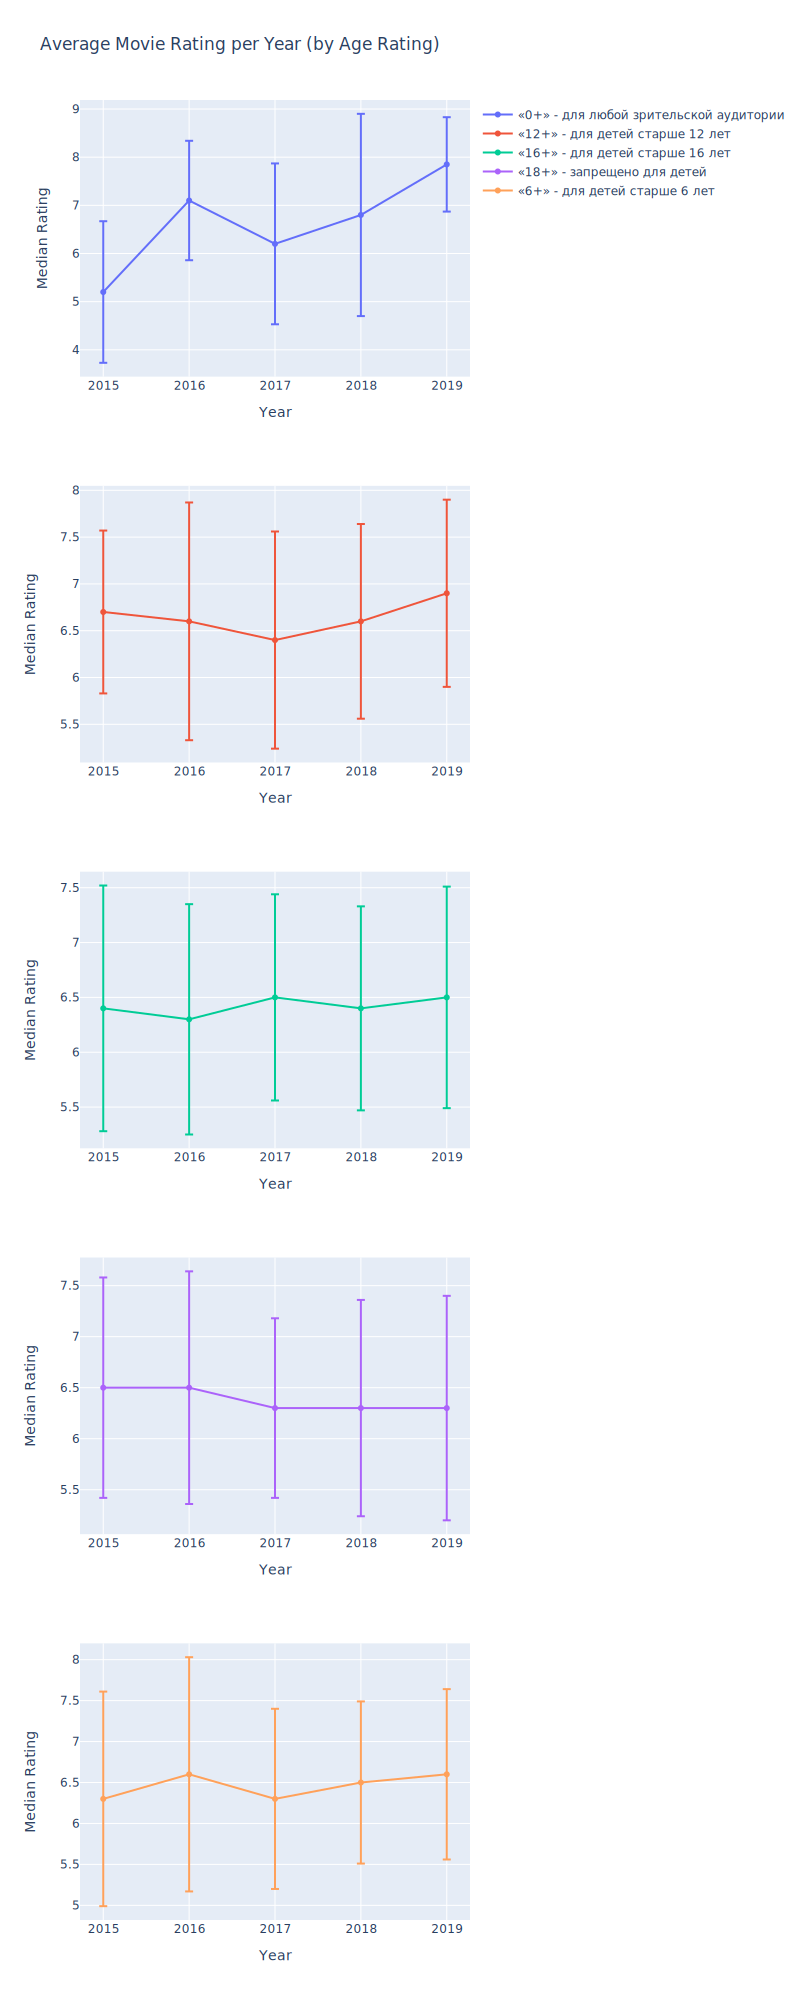

In [41]:
# Grouping and aggregating data
agg_func_math = {
    'ratings': ['median', 'std']
}
table_age_year = data_sr.groupby(['age_restriction','year']).agg(agg_func_math).round(2)
table_age_year.reset_index(inplace=True)

# Getting unique age restrictions
ages = table_age_year['age_restriction'].unique()

# Sorting unique age categories
ages_sorted = sorted(ages)

# Creating subplots for each age rating category
fig = sp.make_subplots(rows=len(ages), cols=1)

# Adding trace to each subplot
for i, age in enumerate(ages_sorted, start=1):
    temp_df = table_age_year[table_age_year['age_restriction'] == age]
    fig.add_trace(go.Scatter(
      x=temp_df['year'],
      y=temp_df[('ratings', 'median')],
      error_y=dict(
          type='data',  # value of error bar given in data coordinates
          array=temp_df[('ratings', 'std')],
          visible=True),
      mode='lines+markers',
      name=age),
      row=i,
      col=1)

# Updating layout
fig.update_layout(height=400*len(ages), width=800, title_text="Average Movie Rating per Year (by Age Rating)")
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Median Rating')

fig.show(renderer="svg")

**Conclusions:**

1. Movies in the "0+" age restriction category show an increasing trend in median ratings from 2015 to 2019, starting from 5.2 in 2015 to 7.85 in 2019. Note that there is a significant jump from 2015 to 2016, and also a slight dip in 2017. The standard deviation also tends to decrease over time (except for 2018), indicating ratings are becoming more consistent.

2. For the age categories “12+”, “16+”, “18+”, and “6+”, the median ratings seem stable over the years, averaging around 6.5 (with small variations), suggesting consistent quality or viewer perception across these categories.

3. While “0+” category has notably higher standard deviations in middle years, for all other categories, the standard deviations are relatively lower (around 1 or less), suggesting that the ratings are relatively close to the median, i.e., there's less divergence in people's opinions for these age categories.

4. Interestingly, movies from the “0+” category saw a significant improvement in ratings from 2015 to 2019, while other categories maintained more consistent ratings.

In conclusion, the quality or the perception of movies, as inferred from the median ratings, has varied significantly over the years for the “0+” category, while it remained relatively stable for other age restrictions. The “0+” category also saw a trend of increased ratings, hinting at improved film quality or positively changed viewer preference over the years. Also, the ratings' spread around the median was generally consistent, with a slight increasing stability observed towards the end of the period.

**Let's see if the box_office affect the rating of movies.**

            ratings  box_office
ratings        1.00        0.13
box_office     0.13        1.00


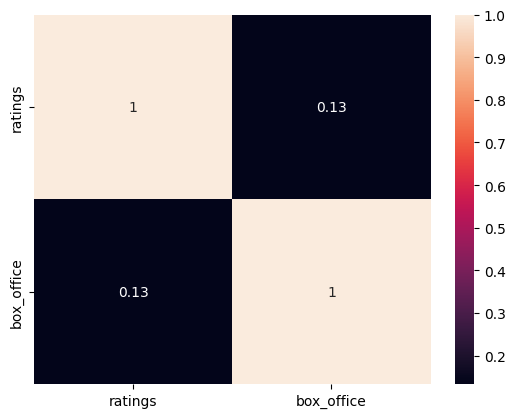

In [42]:
# Selecting only the 'ratings' and 'box_office' columns
selected_columns = data_sr[['ratings', 'box_office']]

# Dropping rows with missing values for more accurate correlation calculation
selected_columns = selected_columns.dropna()

# Calculating the correlation matrix
correlation_matrix = selected_columns.corr()

# Displaying the correlation matrix
print(correlation_matrix)

# Optionally, you can also visualize this correlation matrix using a heatmap:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

**Conclusions:**

This correlation matrix indicates a weak positive correlation of about 0.133 between movie ratings and box office receipts in your dataset.

What this suggests is that there is a slight tendency for movies with higher ratings to also have higher box office receipts. However, the correlation is not strong, meaning that the relationship between these two variables is not very consistent.

It's also important to remember, that correlation does not imply causation. So while higher-rated movies tend to make more at the box office to some extent based on this data, it doesn't mean that high ratings directly lead to higher box office income. Other factors likely come into play, such as marketing, timing of release, competition, movie genre, and so on.

**Overall conclusions:**

1. The number of movies at the box office should be increasing every year, but our data does not reflect this;
2. According to our data, the minimum amount of collections was 49,251,991,405 in 2010 and the maximum in 2018 was 2,428,654;
3. In general, the amount of fees is increasing year after year;
4. Age limit partially affects the amount of dues. For example, 0+ movies have a decreasing amount of collections every year. For other age limits, there is no strong correlation;
5. Films with an age limit of 16+ collected the most money at the box office - 75,640,972,354.8;
6. The rating of the movie does not affect the box office receipts.

<a id="num6"></a>
## 4. A study of films that have received state support 

**Let's look at the average amount of funds allocated for state support of cinema. Also, the average amount of refundable and non-refundable funds.**

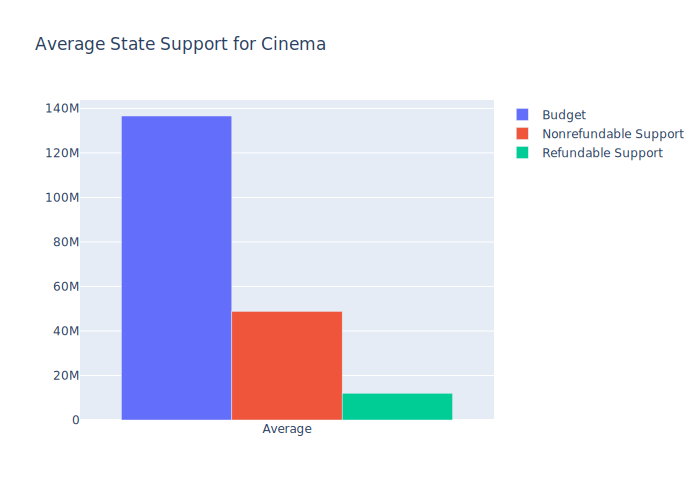

In [43]:
import plotly.graph_objects as go

# Calculate the average (mean) budget, nonrefundable support, and refundable support
avg_budget = data_sr[data_sr['budget'] > 0]['budget'].mean()
avg_nonrefundable_support = data_sr[data_sr['budget'] > 0]['nonrefundable_support'].mean()
avg_refundable_support = data_sr[data_sr['budget'] > 0]['refundable_support'].mean()

# Create a bar chart using Plotly
fig = go.Figure(data=[
    go.Bar(name='Budget', x=['Average'], y=[avg_budget]),
    go.Bar(name='Nonrefundable Support', x=['Average'], y=[avg_nonrefundable_support]),
    go.Bar(name='Refundable Support', x=['Average'], y=[avg_refundable_support])
])

# Change the bar mode
fig.update_layout(barmode='group', title_text='Average State Support for Cinema')

fig.show(renderer="svg")

**Conclusions:**

These values provide us with an insight into the state support provided for movie production and the movie budgeting in the dataset at hand.

The average movie budget is 136.6 million rubles. This value includes all costs associated to producing a movie, and it is a relatively substantial amount, taking into account that this includes low-budget films.

The average nonrefundable support from the state is 48.8 million rubles, which is quite significant. Non-refundable state support is generally provided to encourage the production of a specific type of cinema which may not be commercially viable but is deemed to possess cultural, artistic, or social significance.

The average refundable support from the state is 12 million rubles, significantly less than nonrefundable support amounts. This may reflect the state's emphasis on promoting certain movie types with cultural or artistic merit, as they are inclined to provide more non-refundable versus refundable support.

Another noteworthy point is that the state, on average, seems to cover roughly 44.6% (which is 48.8m non-refundable plus 12m refundable divided by 136.6m budget) of a movie's budget. However, this is just a raw average ratio and doesn't necessarily represent any individual movie's situation due to wide variances across different movie budgets and state supports.

**Let's compare how movies with and without government support pay for themselves.**

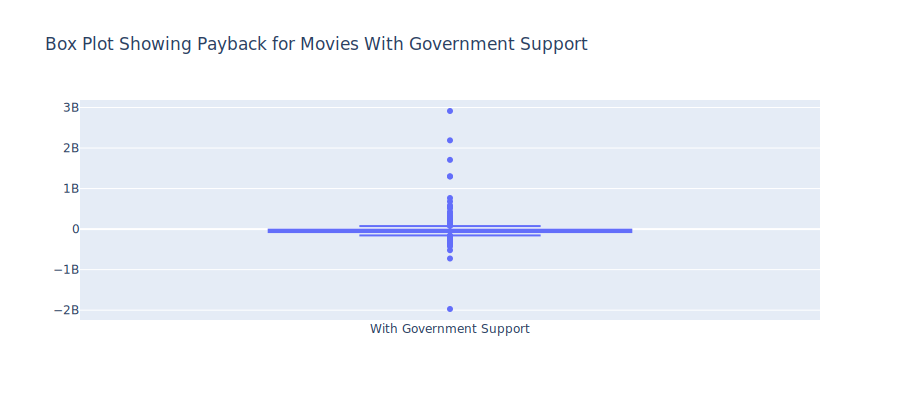

In [44]:
df_right_budget = data_sr.copy()
df_right_budget['payback'] = df_right_budget['box_office'] - df_right_budget['budget']

# Divide the DataFrame into two based on whether the movie received government support
df_no_support = df_right_budget[(df_right_budget['refundable_support'] == 0) & (df_right_budget['nonrefundable_support'] == 0)]
df_with_support = df_right_budget[(df_right_budget['refundable_support'] > 0) | (df_right_budget['nonrefundable_support'] > 0)]

# Create subplots: 2 rows
fig = sp.make_subplots(rows=2, cols=1)

# Add histogram for movies without government support
fig.add_trace(
    go.Histogram(x=df_no_support['payback'], name='Without Government Support', nbinsx=100),
    row=1, col=1)

# Add histogram for movies with government support
fig.add_trace(
    go.Histogram(x=df_with_support['payback'], name='With Government Support', nbinsx=100),
    row=2, col=1)

fig.update_layout(height=600, width=900, title_text="Histograms Showing Payback for Movies With/Without Government Support", bargap=0.1)

fig.show()

# Create box plot for movies without government support
fig1 = go.Figure()
fig1.add_trace(go.Box(y=df_no_support['payback'], name='Without Government Support'))
fig1.update_layout(height=400, width=900, title_text="Box Plot Showing Payback for Movies Without Government Support")

fig1.show()

# Create box plot for movies with government support
fig2 = go.Figure()
fig2.add_trace(go.Box(y=df_with_support['payback'], name='With Government Support'))
fig2.update_layout(height=400, width=900, title_text="Box Plot Showing Payback for Movies With Government Support")

fig2.show(renderer="svg")

**Conclusion:** government-backed movies usually don't pay off. 

**Compare the average rating of publicly funded and non-publicly funded movies.**

In [45]:
df_right_budget = data_sr[data_sr['budget'] > 0]
df_right_not_budget = data_sr[data_sr['budget'] == 0]


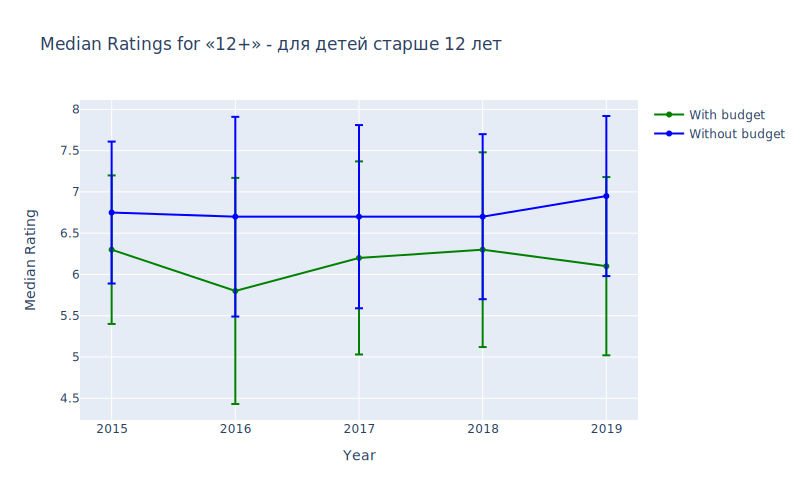

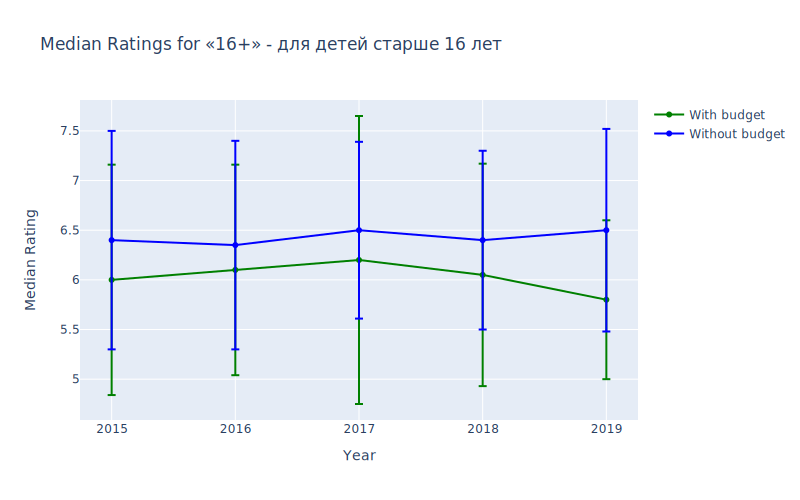

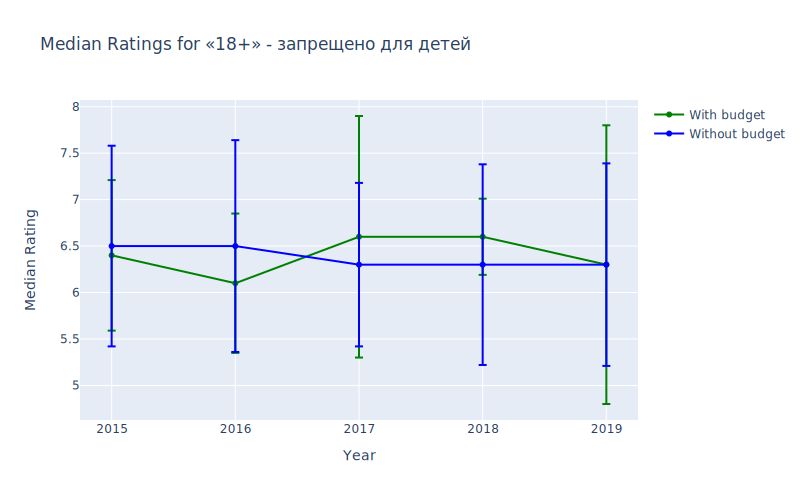

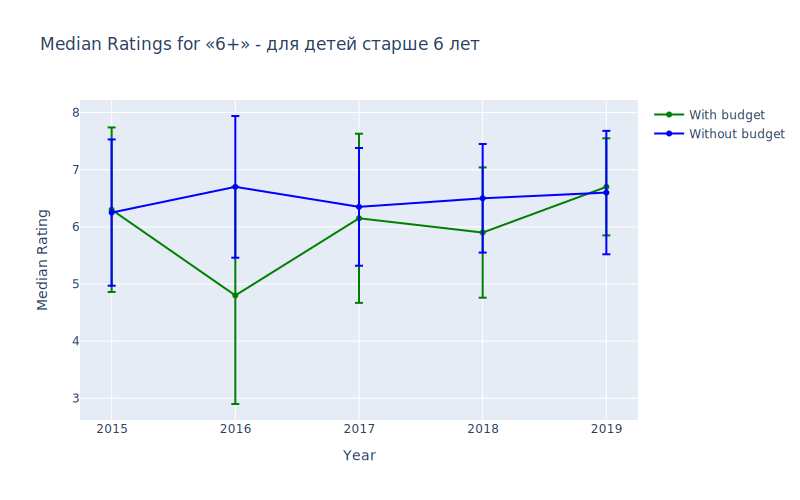

In [46]:
# Define the aggregation function
agg_func_math = {'ratings': ['median', 'std']}

# Group and aggregate the data for movies without a budget
table_age_year_nb = df_right_not_budget.groupby(['age_restriction','year']).agg(agg_func_math).round(2).reset_index()

# Filter the data
table_age_year_nb = table_age_year_nb[table_age_year_nb['year'] > 2014]
table_age_year_nb = table_age_year_nb[table_age_year_nb['age_restriction'] != '«0+» - для любой зрительской аудитории']

# Group and aggregate the data for movies with a budget
table_age_year_b = df_right_budget.groupby(['age_restriction','year']).agg(agg_func_math).round(2).reset_index()

# Filter the data
table_age_year_b = table_age_year_b[table_age_year_b['year'] > 2014]
table_age_year_b = table_age_year_b[table_age_year_b['age_restriction'] != '«0+» - для любой зрительской аудитории']

# Get the unique age restrictions
age_restrictions = table_age_year_b['age_restriction'].unique()

# For each age restriction, generate a chart
for age_r in age_restrictions:
    df_b = table_age_year_b[table_age_year_b['age_restriction'] == age_r]
    df_nb = table_age_year_nb[table_age_year_nb['age_restriction'] == age_r]

    fig = go.Figure()

    # Add traces for movies with a budget
    fig.add_trace(go.Scatter(
        x=df_b['year'],
        y=df_b[('ratings', 'median')],
        error_y=dict(
            type='data',  # value of error bar given in data coordinates
            array=df_b[('ratings', 'std')],
            visible=True),
        mode='markers+lines',
        name='With budget',
        line=dict(color='green')
    ))

    # Add traces for movies without a budget
    fig.add_trace(go.Scatter(
        x=df_nb['year'],
        y=df_nb[('ratings', 'median')],
        error_y=dict(
            type='data',  # value of error bar given in data coordinates
            array=df_nb[('ratings', 'std')],
            visible=True),
        mode='markers+lines',
        name='Without budget',
        line=dict(color='blue')
    ))

    # Update the layout
    fig.update_layout(title='Median Ratings for ' + age_r,
                      xaxis_title='Year',
                      yaxis_title='Median Rating',
                      autosize=False,
                      width=800,
                      height=500)

    # Show the figure
    fig.show(renderer="svg")

**Conclusion:** films with an age category of 6+, 12+, 16+ funded by the state have an average rating lower than films not funded by the state. 18+ films with state support have on average the same rating as films without state support.

**Let's take a look at the top 5 genres of government-sponsored films. Top 5 sponsored filmmakers. Top sources of government funding.**

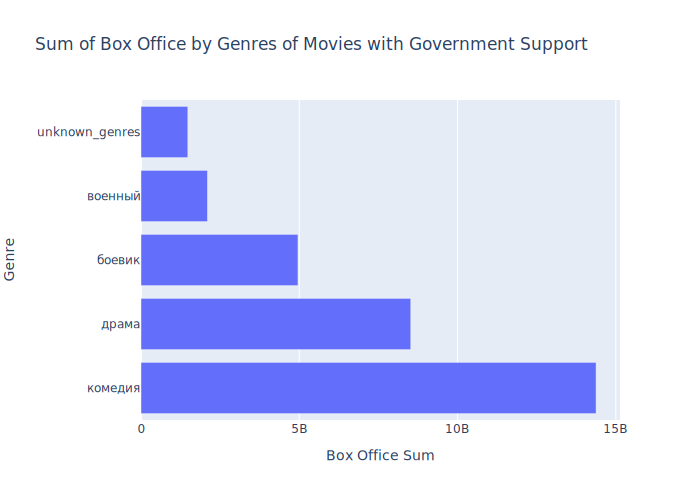

In [47]:
# Define top 5 genres
top_genre = df_right_budget['first_genre'].value_counts()[:5].index.to_list()

# Create a pivot table
mean_box_office_genre = df_right_budget[df_right_budget['first_genre'].isin(top_genre)].pivot_table(
    index='first_genre',
    values=['box_office', 'budget'],
    aggfunc=['count', 'sum', 'median', 'mean', 'min', 'max']
)

# Sort the pivot table for top_genre
mean_box_office_genre_sorted = mean_box_office_genre.loc[top_genre].sort_values(('sum', 'box_office'), ascending=False)

# Define data for the bar chart
data = [
    go.Bar(
        y=mean_box_office_genre_sorted.index,
        x=mean_box_office_genre_sorted[('sum', 'box_office')],
        orientation="h",
    )
]

# Define the layout
layout = go.Layout(
    title="Sum of Box Office by Genres of Movies with Government Support",
    xaxis_title="Box Office Sum",
    yaxis_title="Genre",
    
)

# Create a figure and add data and layout
fig = go.Figure(data=data, layout=layout)

# Show the figure
fig.show(renderer="svg")

**Conclusion:** the government funds the most into movies of the genres comedy, drama and action.

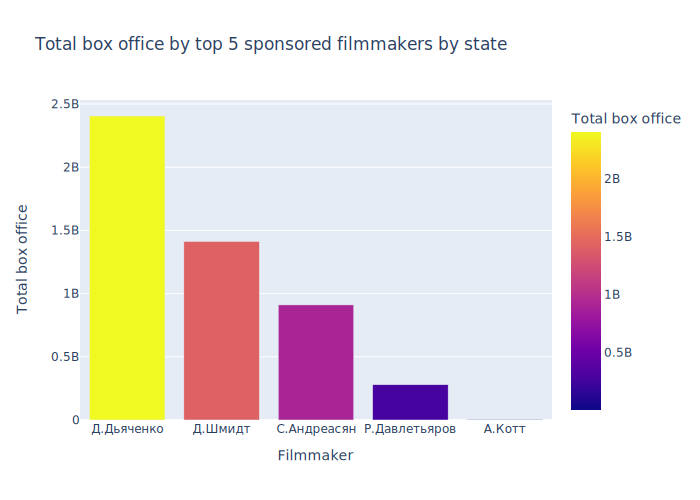

In [48]:
# Identify the top 5 filmmakers with the most state sponsorship
top_director = df_right_budget['first_director'].value_counts().nlargest(5).index

# Filter the dataframe to only rows where the filmmaker is in the top 5, 
# then group by filmmaker and calculate basic statistical descriptions for box office and budget
mean_box_office_director = df_right_budget[df_right_budget['first_director'].isin(top_director)].groupby('first_director')[['box_office', 'budget']].describe()

# Using the filtered dataframe, calculate total box office for each of the top 5 filmmakers, sort from highest to lowest.
mean_box_office_fd = df_right_budget[df_right_budget['first_director'].isin(top_director)].groupby('first_director')['box_office'].sum().sort_values(ascending=False)

# Create a bar chart of total box office for the top 5 filmmakers using plotly express
fig2 = px.bar(mean_box_office_fd.reset_index(), y='box_office', x='first_director', title='Total box office by top 5 sponsored filmmakers by state', labels={'box_office':'Total box office', 'first_director':'Filmmaker'}, color='box_office')

# Display the plot
fig2.show(renderer="svg")

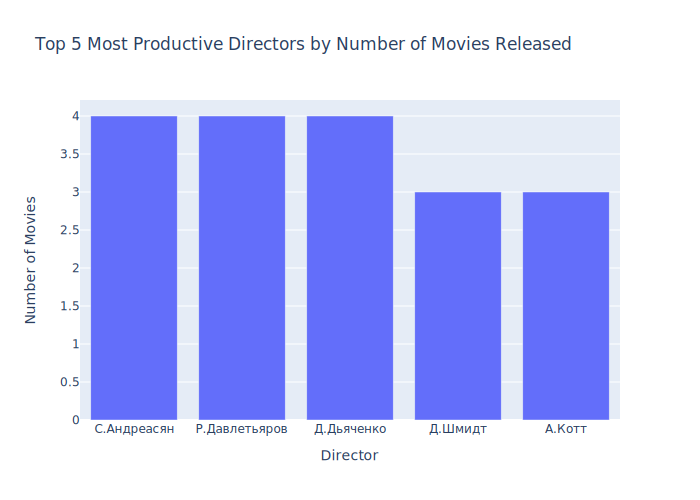

In [49]:
# Count the number of films by each director & get the names of the top 5 most productive directors.
top_productive_director = df_right_budget['first_director'].value_counts().nlargest(5)

# Use Plotly express to create a bar chart.
# 'x' is set to director names and 'y' to number of movies by the director
# Labels are set for x,y axes and a title for chart
fig = px.bar(x=top_productive_director.index, y=top_productive_director.values,
             labels={'x': 'Director', 'y': 'Number of Movies'},
             title='Top 5 Most Productive Directors by Number of Movies Released')

# Render the chart
fig.show(renderer="svg")

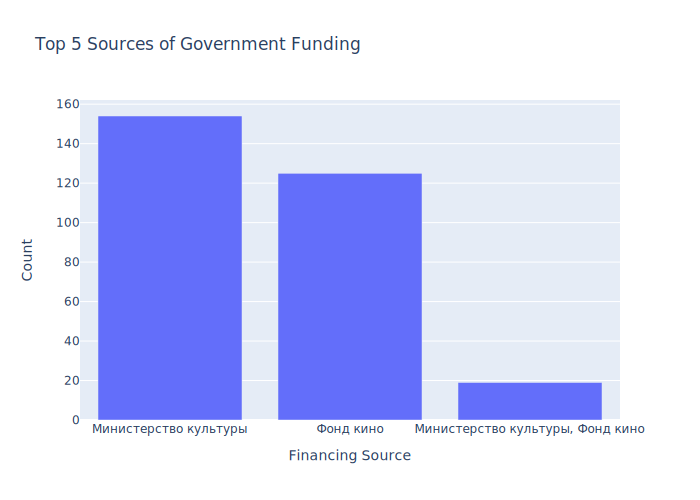

In [50]:
# Get top 5 most common sources of government funding
top_source = df_right_budget['financing_source'].value_counts().nlargest(5)

# Create a bar chart with Plotly Express for visual representation
fig = px.bar(x=top_source.index, y=top_source.values,
             labels={'x': 'Financing Source', 'y': 'Count'},
             title='Top 5 Sources of Government Funding')

# Display the plot
fig.show(renderer="svg")

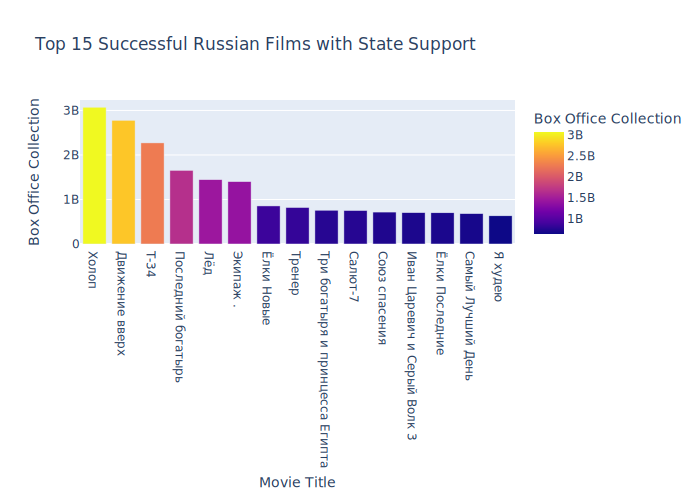

In [51]:
df_right_budget['payback'] = (df_right_budget['box_office'] - df_right_budget['budget'])

# Obtain top 15 Russian films with max box office collection
top15_t = df_right_budget.nlargest(15, 'box_office')

# Create bar chart to visualize box office collections of these top 15 movies
fig_success = px.bar(top15_t,
                     x='title',
                     y='box_office',
                     hover_data=['first_director','budget', 'payback'],
                     title='Top 15 Successful Russian Films with State Support',
                     labels={'title':'Movie Title', 'box_office':'Box Office Collection'},
                     color='box_office')

fig_success.update_layout(xaxis=dict(tickmode='linear'))
fig_success.show(renderer="svg")

c:\Users\Shiro\miniconda3\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



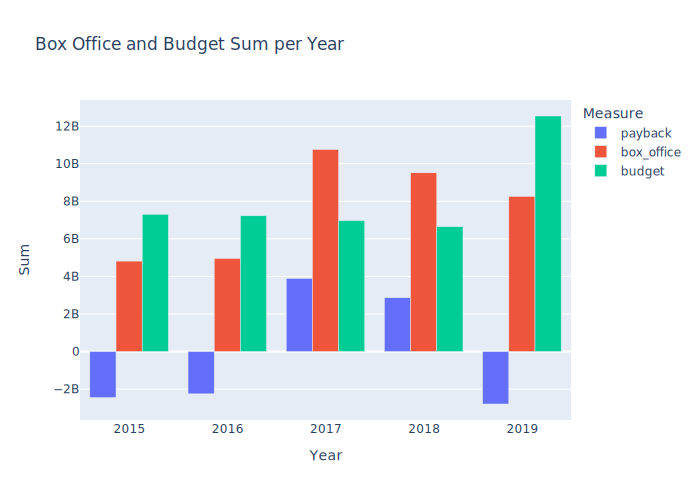

In [52]:
# Use pivot_table function to get the sum of 'box_office' and 'budget' for each 'year'
df_grouped_year = df_right_budget.pivot_table(index='year', 
                                              values=['payback', 'box_office', 'budget'],
                                              aggfunc='sum').reset_index()

# Create bar chart using Plotly
fig = px.bar(df_grouped_year, 
             x="year", 
             y=["payback", "box_office", "budget"], 
             title="Box Office and Budget Sum per Year",
             labels={'value': "Sum", "variable": "Measure", 'year':'Year'},
             barmode='group')

fig.show(renderer="svg")

**Conclusion:** 

1. In the years 2015 and 2016, government-funded films made a loss, with expenses (budget) exceeding box office revenues.

2. A significant upturn occurred in 2017, where box office revenues were appreciably higher than the budget, resulting in substantial profit (approximately 3.89 billion). This indicates a successful year for government-funded films.

3. This wave of success continued in 2018, albeit with slightly lower box-office revenues and payback than in 2017 but still yielding notable profits.

4. However, in 2019 the situation reversed again, and the films made a loss. The budget for that year was significantly higher than previous years (about 12.54 billion compared to approximately 6-7 billion in previous years), but box office revenues did not keep pace, contributing to the loss.

In conclusion, there seems to be variability in the financial success of government-funded films year by year. The data suggests the need for careful financial analysis and strategic planning in state-funded filmmaking to enhance profitability. The years 2017 and 2018 seem to have struck a balance between production budget and box office success, which could be further investigated to draw insights for future decisions.

In [53]:
print('Average rating of films with government support: {:.2f}, median: {}\n'
      'Average rating of films without government support: {:.2f}, median: {}'
      .format(df_right_budget['ratings'].mean(), 
              df_right_budget['ratings'].median(),
              df_right_not_budget['ratings'].mean(), 
              df_right_not_budget['ratings'].median()))

Average rating of films with government support: 6.04, median: 6.2
Average rating of films without government support: 6.43, median: 6.5


**Overall conclusion:**

1. The state sponsors the most comedies - 89;
2. The amount of budget allocated to comedies was - 10,521,261,235;
2. State sponsored comedies collected - 14 billion; 
3. Director D. Dyachenko is the most profitable - 2.4 billion. He is also one of those who have released the most movies - 4.
4. The Ministry of Culture sponsors movies the most. 
5. The second major source of government funding is the Cinema Fund. 
6. Usually, state-supported movies do not break even;
7. Kholop is the highest grossing film (3 billion) among state-supported films;	
8. 2017 and 2018 are the only years with positive returns;
9. On average, the rating of films with government support is 0.39 lower than films without government support.

<a id="num7"></a>
## 5. General conclusion 

**To accomplish the task, the following transformations were performed:**

1. 2 dataframes were merged;
2. Data types were converted;
3. Filled gaps;
4. duplicates were processed;
5. Suspicious values were removed;
6. New columns were added.

**Analyzing the data, the following conclusions were drawn for films without state support:**

1. The number of movies at the box office should be increasing every year, but our data does not reflect this, so the following analysis was performed from 2015 to 2019;
2. In 2015, the total box-office collection was about 38.5 billion, which was the lowest in the given time frame. However, this amount increased over the years, reaching a peak of approximately 49.3 billion in 2018.
3. The total box-office collection amount has been increasing year on year;
4. Movies 0+ have a decreasing amount every year. For other age ranges, there is no strong correlation;
5. Films with an age limit of 16+ collected the most money at the box office - 75 billion;  
6. The rating of the movie does not affect the collections.
   
**For films with government support:**

1. The state sponsors the most comedies - 89;
2. The amount of budget allocated to comedies was - 10,521,261,235;
2. State sponsored comedies collected - 14 billion; 
3. Director D. Dyachenko is the most profitable - 2.4 billion. He is also one of those who have released the most movies - 4.
4. The Ministry of Culture sponsors movies the most. 
5. The second major source of government funding is the Cinema Fund. 
6. Usually, state-supported movies do not break even;
7. Kholop is the highest grossing film (3 billion) among state-supported films;	
8. 2017 and 2018 are the only years with positive returns;
9. On average, the rating of films with government support is 0.39 lower than films without government support.